# Algorithmic Adjustment

In [1]:
import pandas as pd

df = pd.read_csv('/content/binary_encoded_df_2.csv')

In [2]:
df

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1,3,39.865147,-84.058723,0.010,36.9,91.0,29.68,10.0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,2,39.928059,-82.831184,0.010,37.9,100.0,29.65,10.0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,2,39.063148,-84.032608,0.010,36.0,100.0,29.67,10.0,13,...,False,False,False,False,False,False,False,False,False,False
3,1,3,39.747753,-84.205582,0.010,35.1,96.0,29.64,9.0,13,...,False,False,False,False,False,False,False,False,False,False
4,1,2,39.627781,-84.188354,0.010,36.0,89.0,29.65,6.0,13,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7128747,0,2,34.002480,-117.379360,0.543,86.0,40.0,28.92,10.0,15,...,False,False,False,False,False,False,False,False,False,False
7128748,0,2,32.766960,-117.148060,0.338,70.0,73.0,29.39,10.0,13,...,False,False,False,False,False,False,False,False,False,False
7128749,0,2,33.775450,-117.847790,0.561,73.0,64.0,29.74,10.0,12,...,False,False,False,False,False,False,False,False,False,False
7128750,0,2,33.992460,-118.403020,0.772,71.0,81.0,29.62,10.0,13,...,False,False,False,False,False,False,False,False,False,False


In [3]:
X = df.drop(columns=['Severity']) # Severity is the target
y = df['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify if classification
)

import gc
del df  # deletes the reference
gc.collect()  # forces garbage collection

64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

rf = RandomForestClassifier(
    n_estimators=100,
    # warm_start=True,  # can't use warm start with class_weight
    random_state=42,
    n_jobs=6,
    verbose=1,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  5.2min


In [7]:
# Predict on test set
y_pred = rf.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   29.5s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.2min finished


In [8]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# --- Output ---
print("📊 Accuracy:", acc)              # Overall correct predictions
print("📊 Precision:", prec)            # How many selected items were relevant
print("📊 Recall:", rec)                # How many relevant items were selected
print("📊 F1 Score:", f1)               # Harmonic mean of precision and recall
print("📊 Confusion Matrix:\n", conf_matrix)
print("📊 Classification Report:\n", report)

📊 Accuracy: 0.9150052847833239
📊 Precision: 0.9109318357583489
📊 Recall: 0.9150052847833239
📊 F1 Score: 0.9120129050053842
📊 Confusion Matrix:
 [[   8954    3636     512       8]
 [   1130 1106736   29461   10321]
 [    161   54338  176283     768]
 [     43   18603    2445   15231]]
📊 Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.68      0.77     13110
           2       0.94      0.96      0.95   1147648
           3       0.84      0.76      0.80    231550
           4       0.58      0.42      0.49     36322

    accuracy                           0.92   1428630
   macro avg       0.81      0.71      0.75   1428630
weighted avg       0.91      0.92      0.91   1428630



# Undersampling

In [1]:
import pandas as pd

df = pd.read_csv('/content/binary_encoded_df_2.csv')

In [2]:
from sklearn.utils import resample

# Separate by class
df_1 = df[df['Severity'] == 1]
df_2 = df[df['Severity'] == 2]
df_3 = df[df['Severity'] == 3]
df_4 = df[df['Severity'] == 4]

# Undersample class 2
df_2_down = resample(df_2,
                     replace=False,     # no bootstrapping
                     n_samples=len(df_3), # down to size of class 3
                     random_state=42)

# Combine all together
df_under_balanced = pd.concat([df_1, df_2_down, df_3, df_4])
import gc
del df, df_1, df_2, df_2_down, df_3, df_4  # deletes the reference
gc.collect()  # forces garbage collection

69

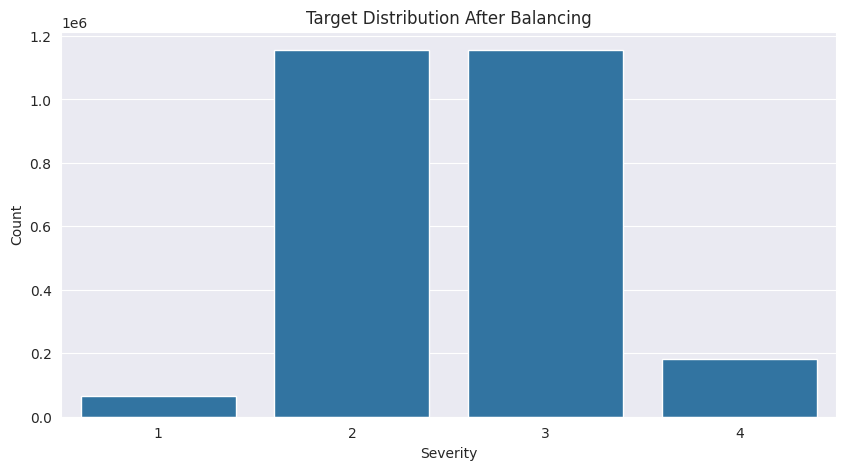

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Under balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=df_under_balanced["Severity"])
plt.title('Target Distribution After Balancing')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [4]:
X = df_under_balanced.drop(columns=['Severity']) # Severity is the target
y = df_under_balanced['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify if classification
)

import gc
del df_under_balanced  # deletes the reference
gc.collect()  # forces garbage collection

378

In [5]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

rf = RandomForestClassifier(
    n_estimators=100,
    # warm_start=True,  # It seems to be faster without it
    random_state=42,
    n_jobs=6,
    verbose=1,
)

rf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  4.2min finished


RandomForestClassifier(n_jobs=6, random_state=42, verbose=1)

In [6]:
# Predict on test set
y_pred = rf.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    8.3s finished


In [7]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# --- Output ---
print("📊 Accuracy:", acc)              # Overall correct predictions
print("📊 Precision:", prec)            # How many selected items were relevant
print("📊 Recall:", rec)                # How many relevant items were selected
print("📊 F1 Score:", f1)               # Harmonic mean of precision and recall
print("📊 Confusion Matrix:\n", conf_matrix)
print("📊 Classification Report:\n", report)

📊 Accuracy: 0.903824239403446
📊 Precision: 0.9049473843042254
📊 Recall: 0.903824239403446
📊 F1 Score: 0.9034092852159092
📊 Confusion Matrix:
 [[ 11561    711    800      9]
 [   853 201539  24223   4548]
 [   333  10871 219813    146]
 [    52   3634   3024  29488]]
📊 Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.88      0.89     13081
           2       0.93      0.87      0.90    231163
           3       0.89      0.95      0.92    231163
           4       0.86      0.81      0.84     36198

    accuracy                           0.90    511605
   macro avg       0.90      0.88      0.89    511605
weighted avg       0.90      0.90      0.90    511605



# Balancing with SMOTE

In [1]:
import pandas as pd

df = pd.read_csv('/content/binary_encoded_df_2.csv')

In [2]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
majority_class = df[df['Severity'] == 2]
other_classes = df[df['Severity'] != 2]

# Take 50% sample of the majority class (Severity 2)
reduced_majority = majority_class.sample(frac=0.5, random_state=42)

# Combine back
balanced_df = pd.concat([reduced_majority, other_classes])

# Optional: shuffle
balanced_df = balanced_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

import gc
del majority_class, other_classes, df, reduced_majority  # deletes the reference
gc.collect()  # forces garbage collection

64

In [4]:
X = balanced_df.drop(columns=['Severity']) # Severity is the target
y = balanced_df['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify if classification
)

# Balance only the training set (The test set must simulate real-world data — including class imbalance.)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

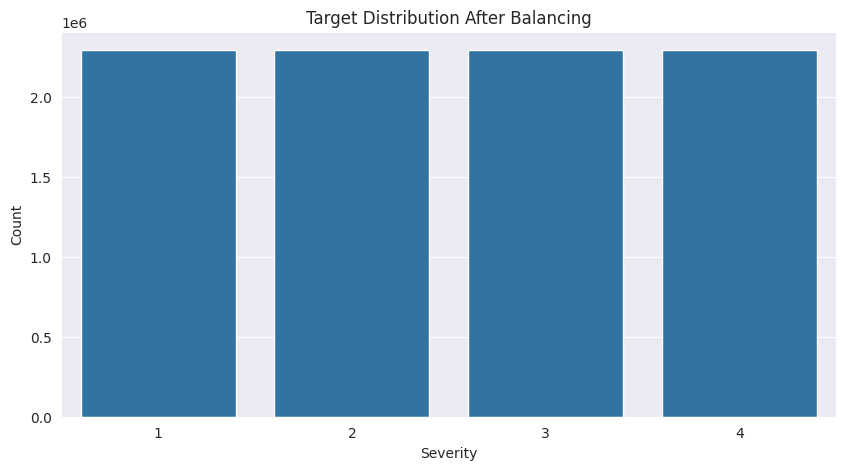

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Under balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_balanced)
plt.title('Target Distribution After Balancing')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_smot = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=6,
    verbose=1
)

rf_smot.fit(X_train_balanced, y_train_balanced)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  8.6min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed: 21.2min finished


RandomForestClassifier(n_jobs=6, random_state=42, verbose=1)

In [7]:
# Predict on test set
y_pred = rf_smot.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:   27.4s finished


In [8]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# --- Output ---
print("📊 Accuracy:", acc)              # Overall correct predictions
print("📊 Precision:", prec)            # How many selected items were relevant
print("📊 Recall:", rec)                # How many relevant items were selected
print("📊 F1 Score:", f1)               # Harmonic mean of precision and recall
print("📊 Confusion Matrix:\n", conf_matrix)
print("📊 Classification Report:\n", report)

📊 Accuracy: 0.9023849601920534
📊 Precision: 0.9049586972512944
📊 Recall: 0.9023849601920534
📊 F1 Score: 0.9030009927420197
📊 Confusion Matrix:
 [[ 11528   1056    484     13]
 [  2236 522813  38706   8899]
 [   428  20563 209886    286]
 [    52   7838   2714  25594]]
📊 Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.88      0.84     13081
           2       0.95      0.91      0.93    572654
           3       0.83      0.91      0.87    231163
           4       0.74      0.71      0.72     36198

    accuracy                           0.90    853096
   macro avg       0.83      0.85      0.84    853096
weighted avg       0.90      0.90      0.90    853096

